In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Räumliche Gliederung
## Bund

In [39]:
R_BU_T01_F = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
aggregate_rows = ~df.Schlüssel.str.contains('\*') # bool array: false where '*' is contained in key
summary_official = df.iloc[0,2:]
sum_rows = [number for r in [range(2,5),range(6,14),range(15,19)] for number in r] # flatten list of ranges to numbers
mean_rows = [5,14,19]
sum_check = df[aggregate_rows].iloc[1:,sum_rows].sum(axis=0) 
mean_check = df[aggregate_rows].iloc[1:,mean_rows].mean(axis=0)
print(summary_official)
print(sum_check)
print(mean_check)
df.head()

Anzahl erfasste Fälle                                    5628584.0
%-Anteil an allen Fällen                                     100.0
erfasste Fälle davon: Anzahl Versuche                       414197
erfasste Fälle davon: Versuche in %                            7.4
Tatortverteilung: bis unter 20.000 Einwohner               1304904
Tatortverteilung: 20.000 bis unter 100.000                 1508727
Tatortverteilung: 100.000 bis unter 500.000                1099424
Tatortveteilung: 500.000 und mehr                          1572975
Tatortverteilung: unbekannt                                 142554
mit Schusswaffe: gedroht                                      4092
mit Schusswaffe: geschossen                                   4442
Aufklärung: Anzahl Fälle                                   3226935
Aufklärung: in % (AQ)                                         57.3
Tatverdächtige: insgesamt                                  2093782
Tatverdächtige: männlich                                   156

,Schlüssel,Straftat,Anzahl erfasste Fälle,%-Anteil an allen Fällen,erfasste Fälle davon: Anzahl Versuche,erfasste Fälle davon: Versuche in %,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortveteilung: 500.000 und mehr,Tatortverteilung: unbekannt,mit Schusswaffe: gedroht,mit Schusswaffe: geschossen,Aufklärung: Anzahl Fälle,Aufklärung: in % (AQ),Tatverdächtige: insgesamt,Tatverdächtige: männlich,Tatverdächtige: weiblich,Nichtdeutsche Tatverdächtige: Anzahl,Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %
0,------,Straftaten insgesamt,5628584.0,100.0,414197,7.4,1304904,1508727,1099424,1572975,142554,4092,4442,3226935,57.3,2093782,1565240,528542,783876,37.4
1,000000,Straftaten gegen das Leben,3077.0,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
2,010000,Mord § 211 StGB,662.0,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
3,010079,Sonstiger Mord,625.0,0.0,425,68,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
4,011000,Mord im Zusammenhang mit Raubdelikten,29.0,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50


In [40]:
R_BU_T01_T = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Tatortverteilung-Prozent.xlsx'
df = pd.read_excel(R_BU_T01_T,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
                        'Unnamed: 4':'Tatortverteilung: 20.000 bis unter 100.000',
                        'Unnamed: 5':'Tatortverteilung: 100.000 bis unter 500.000',
                        'Unnamed: 6':'Tatortverteilung: 500.000 und mehr',
                        'Unnamed: 7':'Tatortverteilung: unbekannt'})
inhabitant_distribution = df.iloc[4,3:].rename('Einwohnerverteilung (01.01.2022) in %')
print(inhabitant_distribution)
df = df.drop(range(5)).reset_index(drop=True)
df.head()

Tatortverteilung: bis unter 20.000 Einwohner    40.576384
Tatortverteilung: 20.000 bis unter 100.000      27.494591
Tatortverteilung: 100.000 bis unter 500.000     15.072914
Tatortverteilung: 500.000 und mehr              16.856111
Tatortverteilung: unbekannt                             x
Name: Einwohnerverteilung (01.01.2022) in %, dtype: object


,Schlüssel,Straftat,Anzahl erfasste Fälle,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortverteilung: 500.000 und mehr,Tatortverteilung: unbekannt
0,------,Straftaten insgesamt,5628584,23.183522,26.804735,19.53287,27.946194,2.53268
1,000000,Straftaten gegen das Leben,3077,28.826779,31.654209,18.39454,20.636984,0.487488
2,010000,Mord § 211 StGB,662,30.966767,24.169184,18.429003,25.075529,1.359517
3,010079,Sonstiger Mord,625,30.72,24.8,18.24,24.8,1.44
4,011000,Mord im Zusammenhang mit Raubdelikten,29,37.931034,13.793103,20.689655,27.586207,0


In [41]:
R_BU_T01_V = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-vollendete-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
df.head()

,Schlüssel,Straftat,Anzahl erfasste Fälle,%-Anteil an allen Fällen,erfasste Fälle davon: Anzahl Versuche,erfasste Fälle davon: Versuche in %,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortveteilung: 500.000 und mehr,Tatortverteilung: unbekannt,mit Schusswaffe: gedroht,mit Schusswaffe: geschossen,Aufklärung: Anzahl Fälle,Aufklärung: in % (AQ),Tatverdächtige: insgesamt,Tatverdächtige: männlich,Tatverdächtige: weiblich,Nichtdeutsche Tatverdächtige: Anzahl,Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %
0,------,Straftaten insgesamt,5628584.0,100.0,414197,7.4,1304904,1508727,1099424,1572975,142554,4092,4442,3226935,57.3,2093782,1565240,528542,783876,37.4
1,000000,Straftaten gegen das Leben,3077.0,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
2,010000,Mord § 211 StGB,662.0,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
3,010079,Sonstiger Mord,625.0,0.0,425,68,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
4,011000,Mord im Zusammenhang mit Raubdelikten,29.0,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50


# Zeitliche Gliederung

In [42]:
Z_T01_F = 'Datasets/PKS/2022/Zeitliche-Gliederung/T01-Faelle.csv'
df = pd.read_csv(Z_T01_F,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
total = df[df.Straftat == 'Straftaten insgesamt']
total#.plot(x='Jahr',y='erfasste Faelle')
#plt.show()

df_z_t01_f = df


,Monat,Straftaten insgesamt
0,Jan.,421337
1,Febr.,390520
2,März,456125
3,April,438373
4,Mai,492336
5,Juni,476460
6,Juli,470170
7,Aug.,467760
8,Sept.,451006
9,Okt.,467533


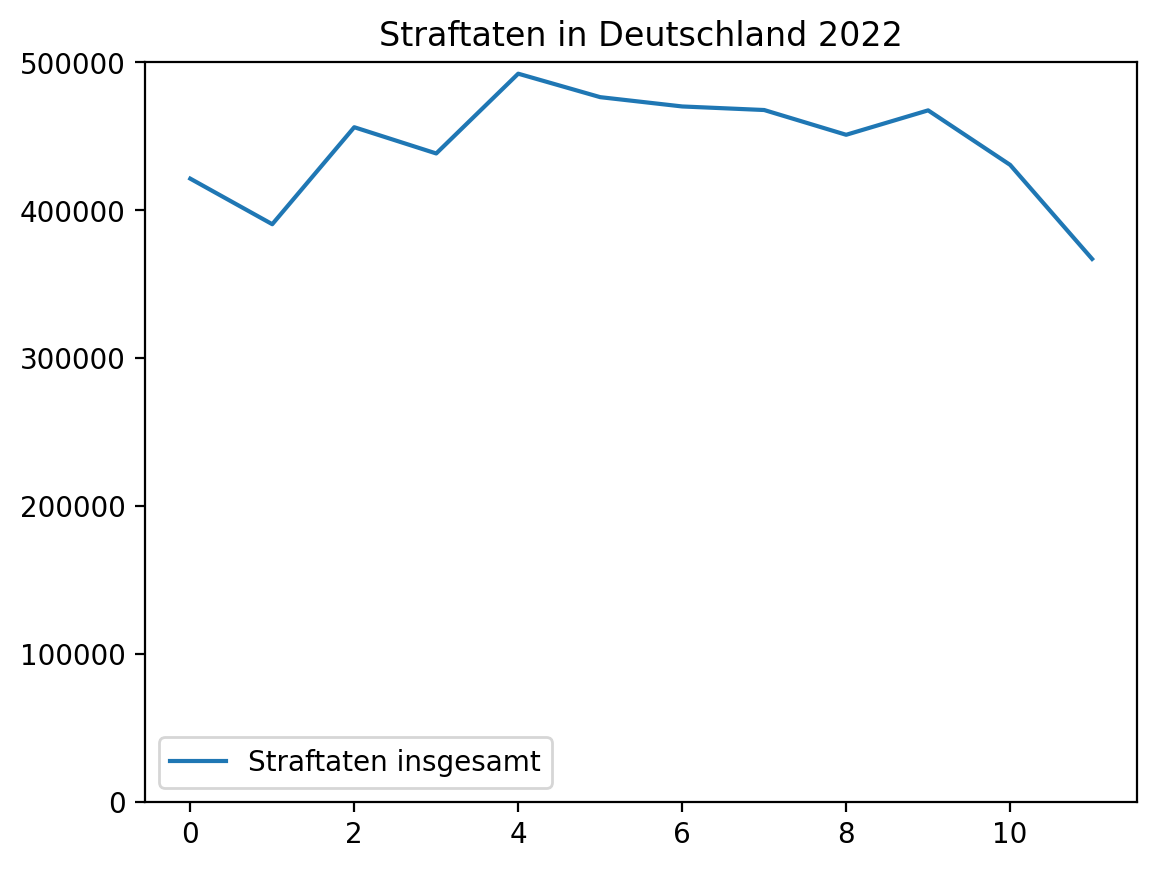

In [43]:
R_BU_T08_T = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T08-Tatzeit.xlsx'
df = pd.read_excel(R_BU_T08_T,skiprows=4,thousands=',',decimal='.')
df.columns.values[3:15] = df.iloc[0,3:15]
df = df.drop([0,1]).reset_index(drop=True)
total = df[df.Straftat == 'Straftaten insgesamt']
total = pd.melt(total.iloc[:,3:-3],var_name='Monat',value_name='Straftaten insgesamt')
ax = total.plot()
plt.title('Straftaten in Deutschland 2022')
ax.set_ylim(0,5e5)
total

In [44]:
from torch.utils.data import Dataset
class DataLoader(Dataset):
    def __init__(self,root_dir):
        self.root_dir = root_dir

    def __len__(self):
        return len(os.listdir(self.root_dir))
    
    def __getitem__(self,year:int = 2022):
        db = {}
        ypath = os.path.join(self.root_dir,str(year))
        for file in os.listdir(ypath):
            fpath = os.path.join(ypath,file)
            # load different types of tables
            if 'BU-F-08' in file:
                df = pd.read_excel(fpath,skiprows=4,thousands=',',decimal='.')
                df.columns.values[3:15] = df.iloc[0,3:15]
                db['BU-F-08'] = df.drop([0,1]).reset_index(drop=True)
            if 'BU-F-01' in file:
                df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
                df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
                        'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
                        'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
                        'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
                        'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
                        'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
                        'Unnamed: 10':'Tatortverteilung: unbekannt',
                        'mit Schusswaffe':'mit Schusswaffe: gedroht',
                        'Unnamed: 12':'mit Schusswaffe: geschossen',
                        'Aufklärung':'Aufklärung: Anzahl Fälle',
                        'Unnamed: 14':'Aufklärung: in % (AQ)',
                        'Tatverdächtige':'Tatverdächtige: insgesamt',
                        'Unnamed: 16':'Tatverdächtige: männlich',
                        'Unnamed: 17':'Tatverdächtige: weiblich',
                        'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
                        'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
                db['BU-F-01'] = df.drop(range(4)).reset_index(drop=True)
            if 'LA-F-01' in file:
                ...
        return db


In [87]:
data = DataLoader('Datasets/PKS/')
data[2021]['BU-F-08'] # error for 2022 due to different file structure

,Schlüssel,Straftat,Anzahl Fälle insgesamt,Jan.,Febr.,März,April,Mai,Juni,Juli,Aug.,Sept.,Okt.,Nov.,Dez.,Tatzeit unbekannt,Schlüssel gültig,Unnamed: 17
0,------,Straftaten insgesamt,4708386,351365,335981,398727,371992,389828,424956,429071,410597,424487,426894,392666,351186,636.0,1971-01-01 00:00:00,9999-12-31 00:00:00
1,000000,Straftaten gegen das Leben,2386,225,209,205,219,212,212,229,223,186,180,145,141,0.0,1975-01-01 00:00:00,9999-12-31 00:00:00
2,010000,Mord § 211 StGB,482,50,40,52,35,42,36,45,42,49,34,27,30,0.0,2014-01-01 00:00:00,9999-12-31 00:00:00
3,010079,Sonstiger Mord,465,44,39,51,35,40,36,43,40,48,34,27,28,0.0,2008-01-01 00:00:00,9999-12-31 00:00:00
4,011000,Mord im Zusammenhang mit Raubdelikten,15,5,1,1,0,2,0,2,2,1,0,0,1,0.0,1999-01-01 00:00:00,9999-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,973060,Amphetamin und seine Derivate in Pulver- oder ...,39.690,3861,3683,3926,3525,3581,3324,3294,3140,3067,3160,2806,2313,10.0,2014-01-01 00:00:00,9999-12-31 00:00:00
1172,973070,"Methamphetamin in Pulver-, kristalliner oder f...",11.559,1270,1112,1264,1075,1049,1024,969,801,849,789,710,646,1.0,2014-01-01 00:00:00,9999-12-31 00:00:00
1173,973080,Cannabis und Zubereitungen,192.484,18947,19224,19308,17445,16854,16261,15548,14262,14442,14883,13218,12020,72.0,2014-01-01 00:00:00,9999-12-31 00:00:00
1174,973090,Sonstige Betäubungsmittel,17.984,1703,1759,1816,1588,1508,1494,1443,1436,1432,1420,1281,1088,16.0,2014-01-01 00:00:00,9999-12-31 00:00:00


Creating some plots to visualize the relation between vrimes in gerneal and cybercrimes

Text(0.5, 1.0, 'Overall Crimes')

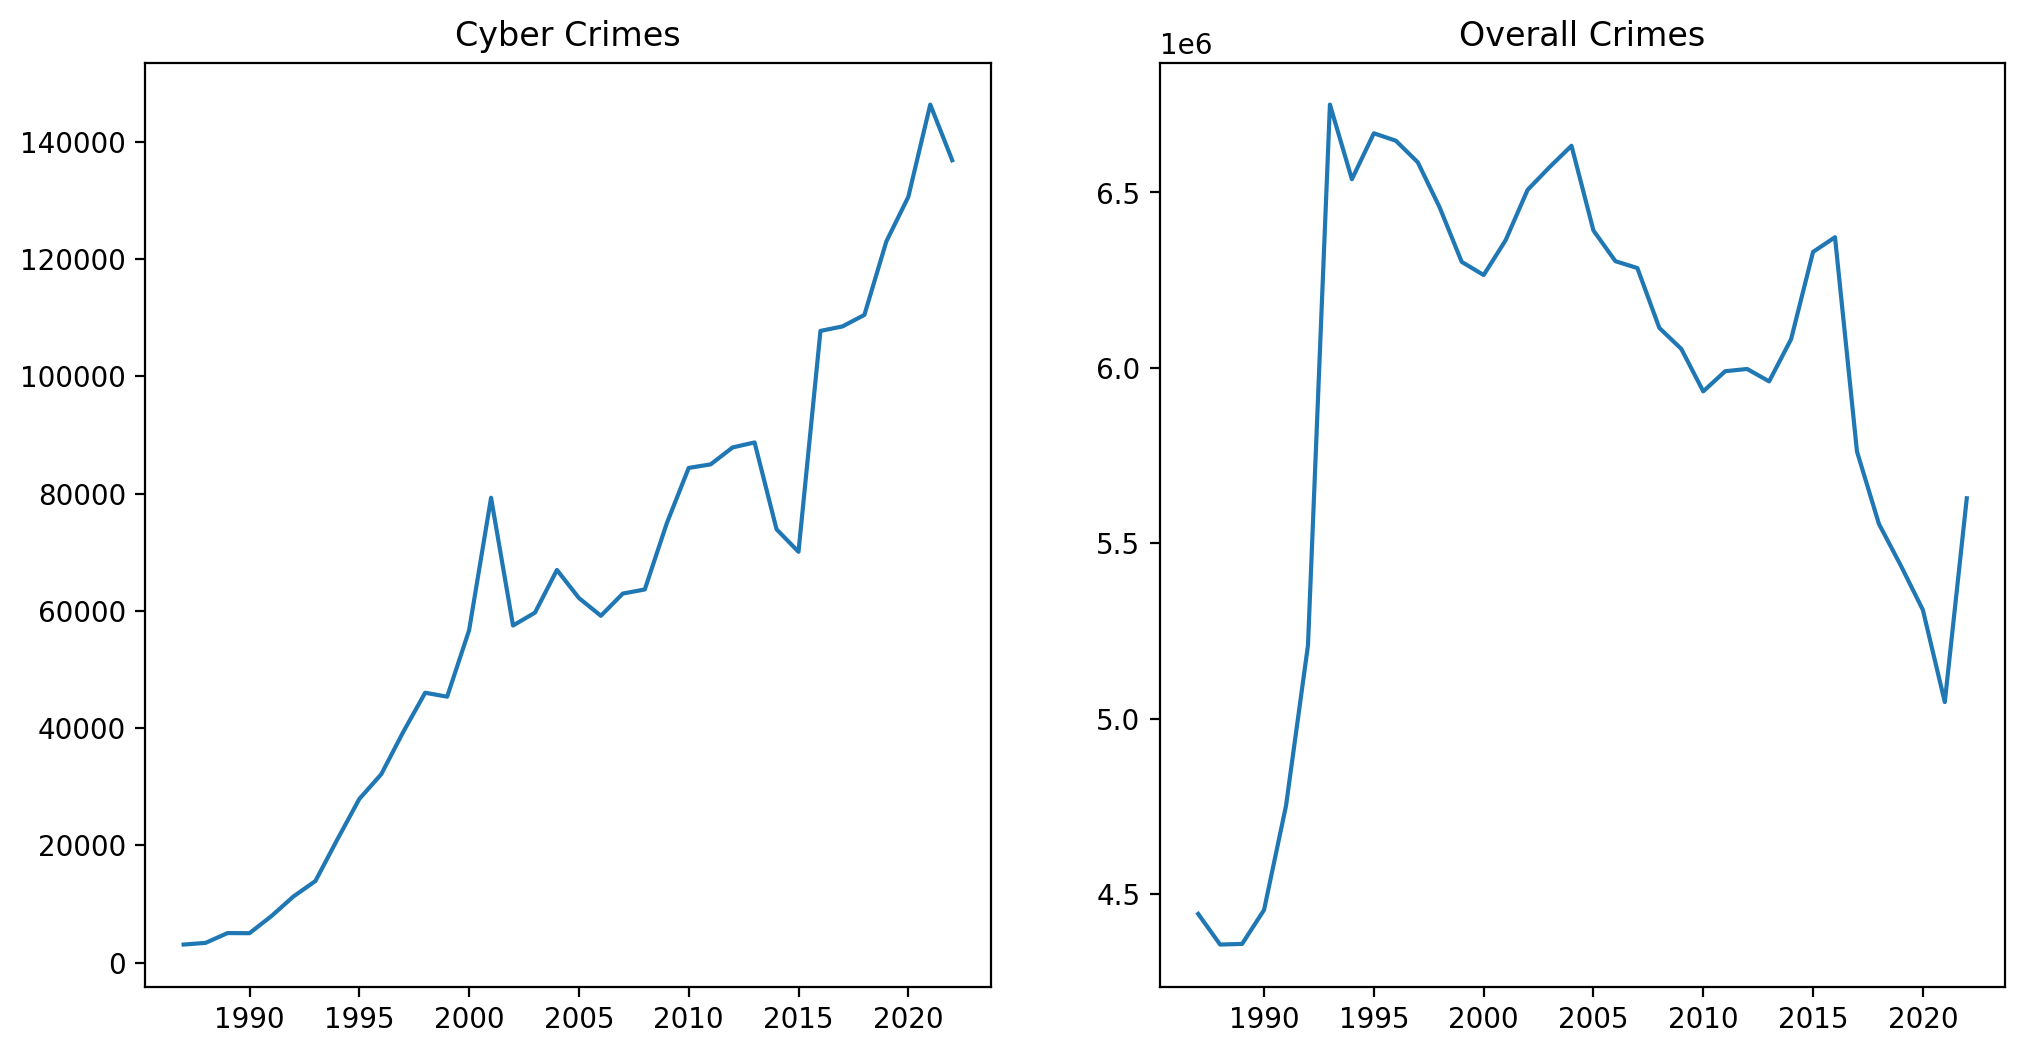

In [49]:
def get_data_times_series(key):
    crime_data = df_z_t01_f[df_z_t01_f['Schluessel'] == key]
    crime_data_years = list(crime_data['Jahr'])
    crime_data_cases = list(crime_data['erfasste Faelle'])
    
    return crime_data, crime_data_years, crime_data_cases


all_crimes, all_crimes_x, all_crimes_y = get_data_times_series('------')
cyber_crimes, cyber_crimes_x, cyber_crimes_y = get_data_times_series('897000')


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(cyber_crimes_x, cyber_crimes_y)
axs[0].set_title('Cyber Crimes')

axs[1].plot(all_crimes_x, all_crimes_y)
axs[1].set_title('Overall Crimes')

In [47]:
# Return Pearson product-moment correlation coefficients
print(np.corrcoef(all_crimes_y, cyber_crimes_y))

[[1.         0.15108436]
 [0.15108436 1.        ]]


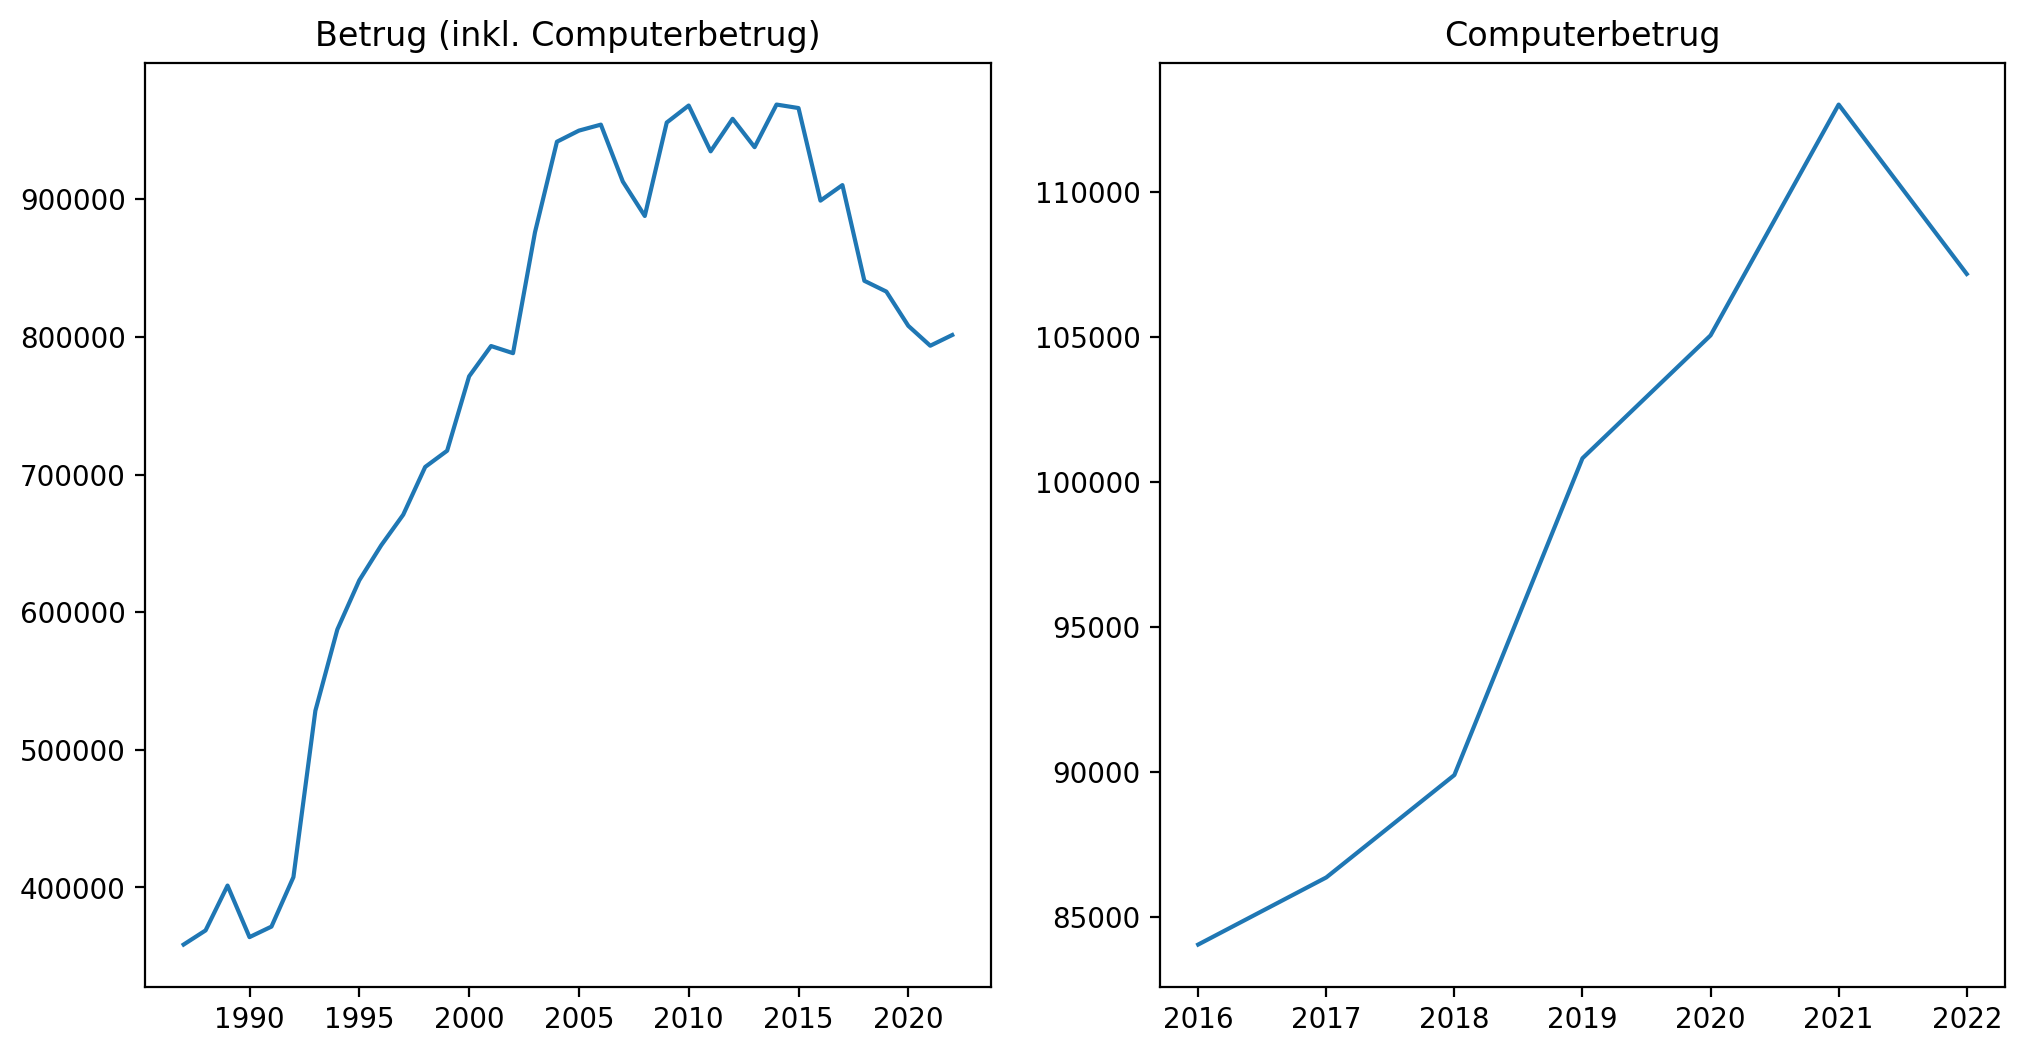

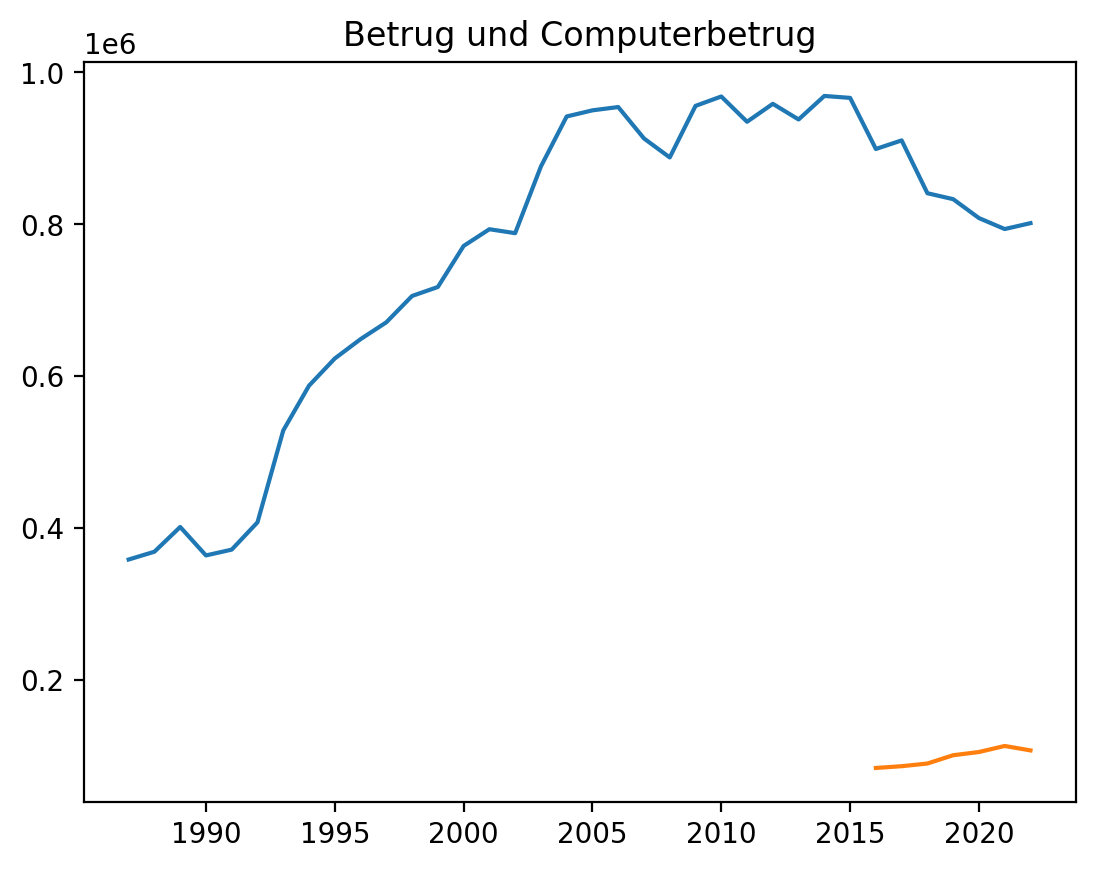

In [56]:
computerbetrug, computerbetrug_x, computerbetrug_y = get_data_times_series('897100')
betrug, betrug_x, betrug_y = get_data_times_series('510000')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(betrug_x, betrug_y)
axs[0].set_title('Betrug (inkl. Computerbetrug)')

axs[1].plot(computerbetrug_x, computerbetrug_y)
axs[1].set_title('Computerbetrug')
plt.show()
plt.close()

plt.title('Betrug und Computerbetrug')
plt.plot(betrug_x, betrug_y)
plt.plot(computerbetrug_x, computerbetrug_y)

### Relationship between Betrug and Computerbetrug

There seems to be a strong negative correlation between Betrug and Computerbetrug.  
Data for Computerbetrug is only available from 2016


Pearson product-moment correlation coefficients of Betrug and Computerbetrug
[[ 1.         -0.92993189]
 [-0.92993189  1.        ]]


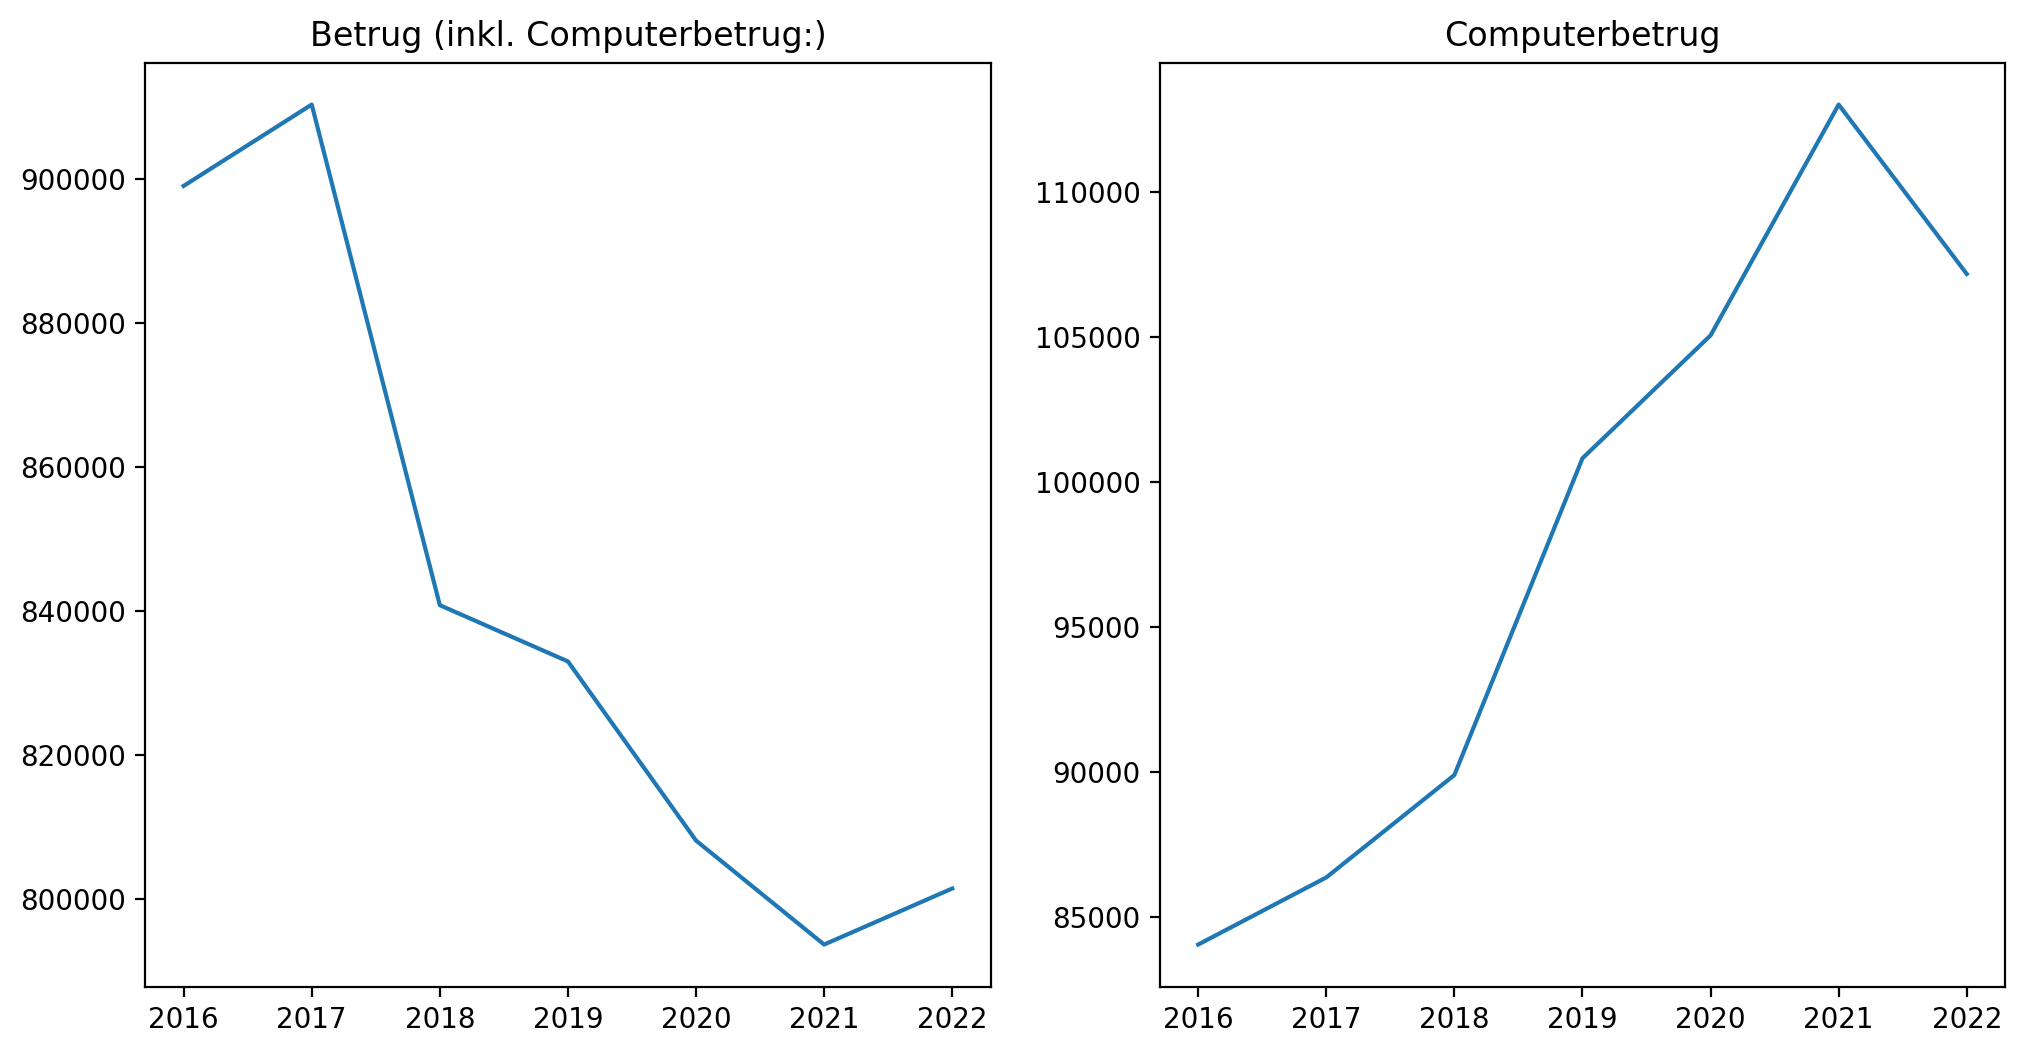

In [67]:
n = len(computerbetrug_y)

# print(betrug_y)
# print(betrug_y[-n:])
# print(computerbetrug_y)

print('Pearson product-moment correlation coefficients of Betrug and Computerbetrug')
print(np.corrcoef(betrug_y[-n:], computerbetrug_y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(computerbetrug_x, betrug_y[-n:])
axs[0].set_title('Betrug (inkl. Computerbetrug:)')

axs[1].plot(computerbetrug_x, computerbetrug_y)
axs[1].set_title('Computerbetrug')
plt.show()
plt.close()


### Starting to get monthly data for covid years

[[65980, 60773, 60313, 64906, 59479, 57444, 60782, 56254, 54698, 55805, 52140, 41987], [71323, 60840, 54680, 45617, 56073, 59485, 61693, 55538, 53552, 52877, 50203, 41045], [59758, 54334, 61906, 55690, 58860, 55116, 55332, 54433, 53456, 54735, 50676, 40351]]


/tmp/ipykernel_3874/2423623588.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cases_month = int(df[month][df['Schlüssel'] == '510000'])


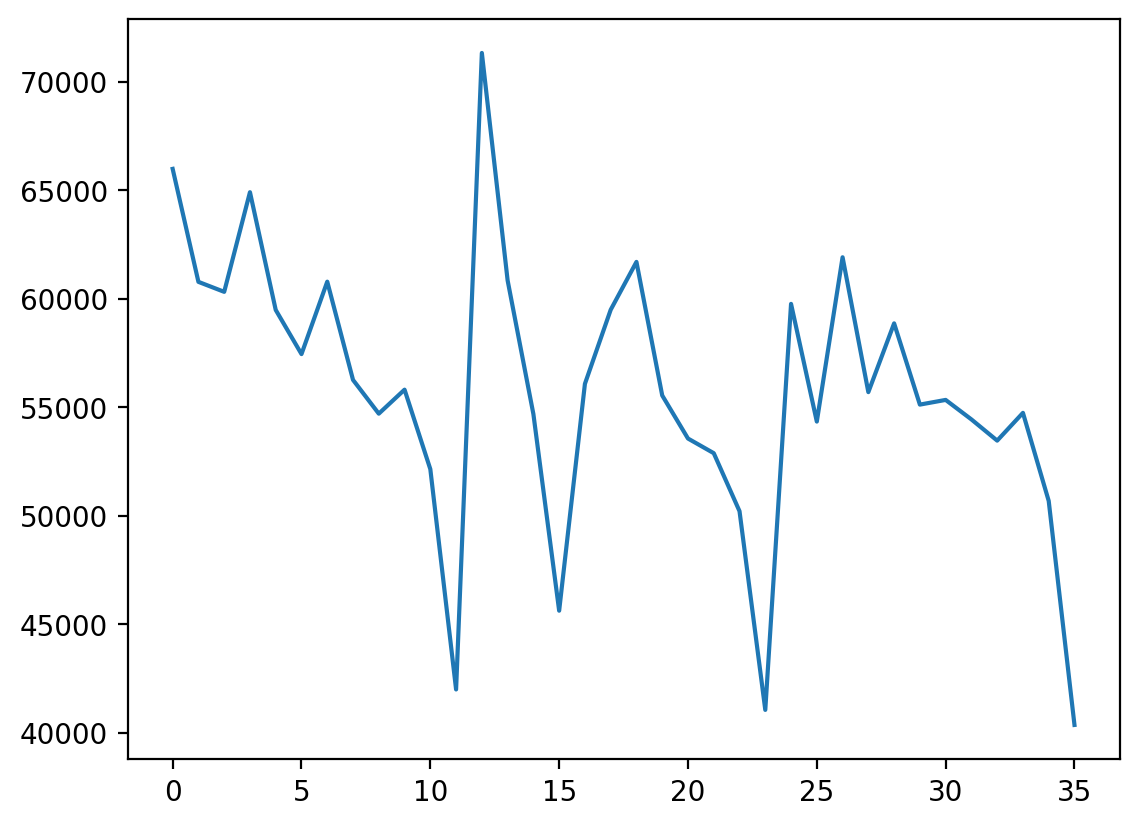

In [108]:
months = ['Jan.', 'Febr.', 'März', 'April', 'Mai', 'Juni', 'Juli', 'Aug.', 'Sept.', 'Okt.', 'Nov.', 'Dez.']
df_years = list()

data_2019 = data[2019]['BU-F-08']
data_2020 = data[2020]['BU-F-08']
data_2021 = data[2021]['BU-F-08']

df_years.append(data_2019)
df_years.append(data_2020)
df_years.append(data_2021)

cases_by_year = list()
for df in df_years:
    cases_curr_year = list()
    for month in months:
        cases_month = int(df[month][df['Schlüssel'] == '510000'])
        cases_curr_year.append(cases_month)
    
    cases_by_year.append(cases_curr_year)

print(cases_by_year)

flatten_cases = [element for year in cases_by_year for element in year]

# Development in 2019, 2020, 2021 -> not very beautiful yet
plt.plot(list(range(len(flatten_cases))), flatten_cases)